<a href="https://colab.research.google.com/github/ilavarasuej/time_series_forecast/blob/main/transaction_timeseries_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
from google.colab import drive

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Mount the drive and move the specific folder path
drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks/")
os.listdir()

Mounted at /content/drive


['data.csv',
 'world_coordinates.csv',
 'Untitled (3)',
 'Untitled0.ipynb',
 'bh_data.txt',
 'Untitled (2)',
 'Untitled (1)',
 'Untitled',
 'Untitled1.ipynb',
 'EDA_Python.ipynb',
 'Untitled2.ipynb',
 'bh_time_series_v1.0.ipynb',
 'Untitled3.ipynb',
 'bh_time_series_v1.5.ipynb',
 'transaction_timeseries_forecast_model.ipynb',
 'time_series_analysis.ipynb',
 'transaction_timeseries_EDA.ipynb']

In [ ]:
# Load the data and transform the Date column to time series format

In [5]:
df = pd.read_csv("bh_data.txt",delimiter=',')
df.columns=['Date', 'Transactions']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01',
               ...
               '2019-06-29', '2019-06-30', '2019-01-07', '2019-02-07',
               '2019-03-07', '2019-04-07', '2019-05-07', '2019-06-07',
               '2019-07-07', '2019-08-07'],
              dtype='datetime64[ns]', name='Date', length=1285, freq=None)

In [6]:
# Check for null data and there is no missing value in the given data set
df.isnull().sum(axis=0)

Transactions    0
dtype: int64

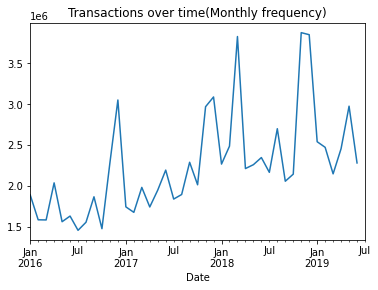

In [7]:
# Monthly analysis of the given dataset
# asfreq method is used to convert a time series to a specified frequency, monthly frequency.
df["Transactions"].asfreq('M').plot() 
plt.title('Transactions over time(Monthly frequency)')
plt.show()

In [26]:
ts = df['2016-01-01':'2018-12-31'].resample('M').sum()
ts.tail()

,Transactions
Date,
2018-08-31,69479800
2018-09-30,67675150
2018-10-31,71196900
2018-11-30,81078151
2018-12-31,173976486


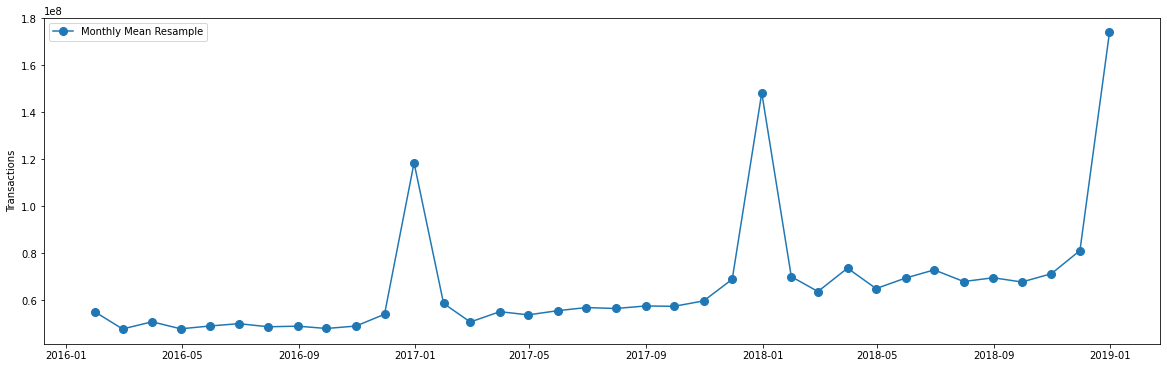

In [27]:
timeseries = ts['Transactions']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(timeseries.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Transactions')
ax.legend();

In [ ]:
import statsmodels.api as sm
# graphs to show seasonal_decompose
def seasonal_decompose_func(y):
    decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative',extrapolate_trend='freq', freq=12)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

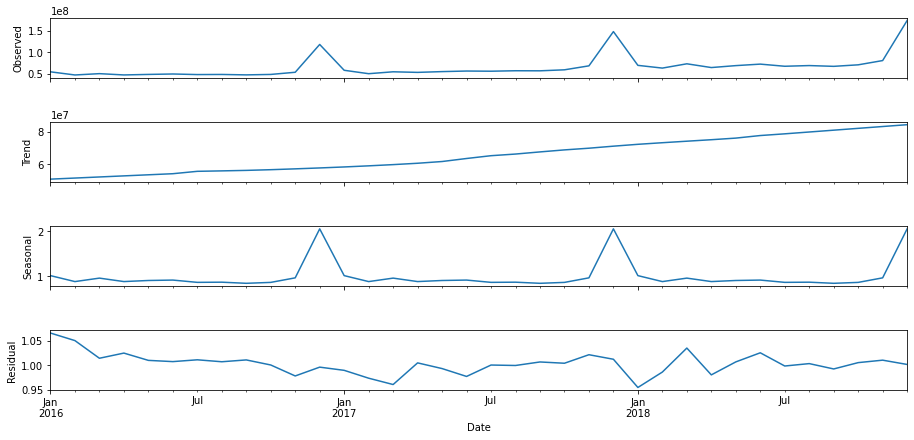

In [23]:
seasonal_decompose_func(ts)

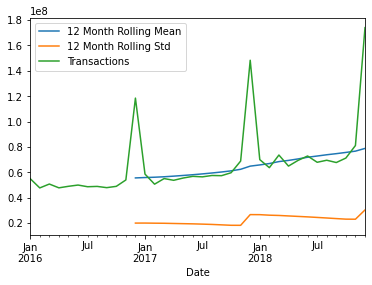

In [28]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

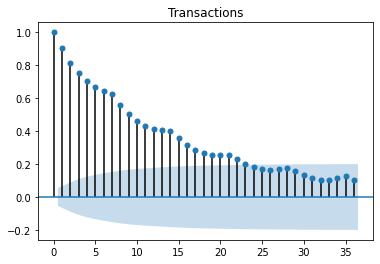

In [11]:
# Autocorrelation of Transactions , it describes how well the present value of the series is related with its past values.
# A time series can have components like trend, seasonality, cyclic and residual. 
# ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.
plot_acf(df["Transactions"],lags=36,title="Transactions")
plt.show()

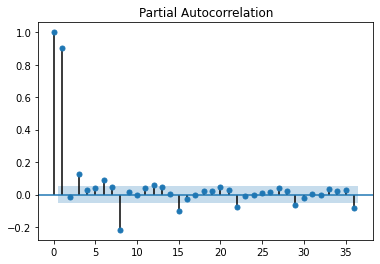

In [10]:
# Partial Autocorrelation of transactions
plot_pacf(df["Transactions"],lags=36)
plt.show()

In [18]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [29]:
ADF_test(timeseries,'raw data')

 > Is the raw data stationary ?
Test statistic = -2.770
P-value = 0.063
Critical values :
	1%: -3.6327426647230316 - The data is not stationary with 99% confidence
	5%: -2.9485102040816327 - The data is not stationary with 95% confidence
	10%: -2.6130173469387756 - The data is  stationary with 90% confidence
